In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import *

In [2]:
# Метод прогонки
def tridiagonal_matrix_algorithm(a, b, c, d, n):
    
    for i in range(1, n):
        coef = a[i]/b[i-1]
        b[i] -= coef * c[i-1]
        d[i] -= coef * d[i-1]
    
    for i in range(n - 1, 0, -1):
        coef = c[i-1]/b[i]
        d[i - 1] -= d[i] * coef
    
    return [d[i] / b[i] for i in range(n)]

def get_gamma(Dom, Ran):
    n = len(Dom)
    
    # шаг сетки
    h = np.array([Dom[i] - Dom[i-1] for i in range(1, n)])
    h = np.hstack((np.array([0]), h))

    a = np.array([h[i]/6 for i in range(2, n - 1)])
    a = np.hstack((np.array([0]), a))
    
    b = np.array([(h[i] + h[i+1])/3 for i in range(1, n - 1)])
    
    c = np.array([h[i+1]/6 for i in range(1, n- 2)])
    c = np.hstack((c, np.array([0])))
    
    d = np.array([(Ran[i+1] - Ran[i])/h[i+1] - (Ran[i] - Ran[i-1])/h[i] for i in range(1, n-1)])
    

    gamma = tridiagonal_matrix_algorithm(a, b, c, d, n-2)
    gamma.insert(0, 0)
    gamma.append(0)
    return gamma

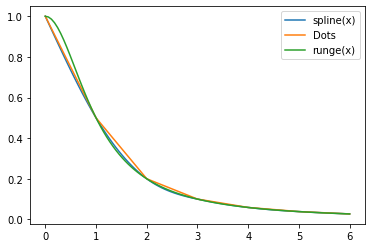

In [3]:
# Функция
runge = lambda x: 1/(1 + x**2)

# Участок
Dom = np.arange(7)
Ran = np.array([runge(t) for t in Dom])

# полином
def P(i, x):
    gamma = get_gamma(Dom, Ran)
    h = [0] + [Dom[i] - Dom[i-1] for i in range(1, len(Dom))]
    p1 = Ran[i - 1]*(Dom[i] - x)/h[i]
    p2 = gamma[i-1]*((Dom[i] - x)**3 - (Dom[i] - x)*h[i]**2)/(6 * h[i])
    p3 = Ran[i]*(x - Dom[i - 1])/h[i]
    p4 = gamma[i]*((x - Dom[i-1])**3 - (x - Dom[i-1])*h[i]**2)/(6*h[i])
    return p1 + p2 + p3 + p4

# cплайн
def spline(x):    
    for i in range(1, len(Dom)):
        if ((i == 1) and (Dom[0] <= x <= Dom[1])) or (Dom[i-1] < x <= Dom[i]):
            return P(i, x)
        

eps = 0.01
Ox = np.linspace(Dom.min(), Dom.max(), 100)
        
plt.plot(Ox, [spline(x) for x in Ox], label='spline(x)')
plt.plot(Dom, Ran, label='Dots')
plt.plot(Ox, [runge(x) for x in Ox], label='runge(x)')
plt.legend()
plt.show()

In [4]:
def get_coef(i):
    gamma = get_gamma(Dom, Ran)
    h = [0] + [Dom[i] - Dom[i-1] for i in range(1, len(Dom))]
    a3 = (gamma[i] - gamma[i-1])/(6*h[i])
    a2 = (gamma[i-1] * Dom[i] - gamma[i] * Dom[i - 1])/(2 * h[i])
    a1 = (gamma[i] * Dom[i - 1] ** 2 - gamma[i - 1] * Dom[i] ** 2)/(2 * h[i]) + (Ran[i] - Ran[i - 1])/h[i] - h[i] * (gamma[i] - gamma[i-1]) / 6
    a0 = (gamma[i-1] * Dom[i]**3 - gamma[i] * Dom[i-1] ** 3)/(6*h[i]) + (Ran[i-1] * Dom[i] - Ran[i] * Dom[i - 1])/h[i] + h[i]*(gamma[i] * Dom[i - 1] - gamma[i - 1] * Dom[i]) / 6
    return [a3, a2, a1, a0]

def Q(i, x):
    a3, a2, a1, a0 = get_coef(i)
    return a3 * x**3 + a2 * x**2 + a1 * x + a0


for i in range(1, len(Dom)):
        a3, a2, a1, a0 = get_coef(i)
        print(f'P_{i}(x) = {a3}x^3 + {a2}x^2 + {a1}x + {a0}')

P_1(x) = 0.0402666955155643x^3 + 0.0x^2 + -0.5402666955155643x + 1.0
P_2(x) = -0.0013334775778214801x^3 + 0.12480051928015734x^2 + -0.6650672147957216x + 1.041600173093386
P_3(x) = -0.034932785204278415x^3 + 0.32639636503889896x^2 + -1.0682589063132049x + 1.3103946341050412
P_4(x) = -0.00011185219330015622x^3 + 0.01300796794009463x^2 + -0.12809371501679193x + 0.37022944280862835
P_5(x) = -0.0026288557962766135x^3 + 0.043212011175812116x^2 + -0.24890988795966187x + 0.5313176733991216
P_6(x) = -0.0012597247438876386x^3 + 0.022675045389977496x^2 + -0.14622505903048877x + 0.36017629185049976


In [5]:
# Функция
runge = lambda x: 1/(1 + x**2)
g = lambda x: 1/(1 + e**(-x))

# Участок
N = 7
D1 = np.arange(7)
E1 = np.array([runge(t) for t in D1])

M = 7
D2 = np.arange(-2, 5)
E2 = np.array([g(x) for x in D1])

if (D2[0] <= D1[N - 1]) or (D1[0] <= D2[N - 1]):
    for i in range(1, N):
        for j in range(1, M):
            left_border = min(D1[i - 1], D2[i - 2])
            right_border = max(D1[i], D2[i])
            if left_border <= right_border:
                 
else:
    print("There doesn't exist any intersection between these two splines within borders")

IndentationError: expected an indented block after 'if' statement on line 19 (1157149513.py, line 23)

In [ ]:
np.roots([1, 0, 0, -1])

In [ ]:
z = 5+3j
w = 7 + 8j

w.real